In [ ]:
import graphviz
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Train a decision tree classifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X, y)

# Extract information from the tree for visualization
n_nodes = tree.tree_.node_count
children_left = tree.tree_.children_left
children_right = tree.tree_.children_right
feature = tree.tree_.feature
threshold = tree.tree_.threshold
impurity = tree.tree_.impurity
n_node_samples = tree.tree_.n_node_samples
weighted_n_node_samples = tree.tree_.weighted_n_node_samples
feature_names = data.feature_names
class_names = data.target_names

# Check if nodes are leaves
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
for i in range(n_nodes):
    if children_left[i] == children_right[i]:
        is_leaves[i] = True

# Function to generate DOT source from the tree structure
def get_dot_source(tree, feature_names, class_names):
    dot_source = 'digraph Tree {\n'

    for i in range(n_nodes):
        node_info = f"Node {i}\\n"
        node_info += f"Samples: {n_node_samples[i]}\\n"
        node_info += f"Value: {tree.tree_.value[i].round(2)}\\n"
        node_info += f"Impurity: {impurity[i].round(2)}\\n"
        node_info += f"Weighted samples: {weighted_n_node_samples[i].round(2)}\\n"

        if is_leaves[i]:
            dot_source += f'{i} [label="{node_info}", shape="box"];\n'
        else:
            node_info += f"Feature: {feature_names[feature[i]]}\\n"
            node_info += f"Threshold: {threshold[i].round(2)}"
            dot_source += f'{i} [label="{node_info}"];\n'

        if children_left[i] != -1:
            dot_source += f'{i} -> {children_left[i]} [labeldistance=2.5, labelangle=45, headlabel="True"];\n'
        if children_right[i] != -1:
            dot_source += f'{i} -> {children_right[i]} [labeldistance=2.5, labelangle=-45, headlabel="False"];\n'

    dot_source += '}'
    return dot_source

# Generate the DOT source
dot_source = get_dot_source(tree, feature_names, class_names)

# Define file paths
dot_path = '/mnt/data/tree_graph.dot'
png_path = '/mnt/data/tree_graph.png'

import os

# Define file paths
directory = '/mnt/data'
if not os.path.exists(directory):
    os.makedirs(directory)

dot_path = os.path.join(directory, 'tree_graph.dot')
png_path = os.path.join(directory, 'tree_graph.png')

# # The PNG file path
# print(f"The tree graph is saved as {png_path}")

In [ ]:
# Use the command line utility of Graphviz to render the PNG image
!dot -Tpng {dot_path} -o {png_path}

Error: dot: can't open /mnt/data/tree_graph.dot


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


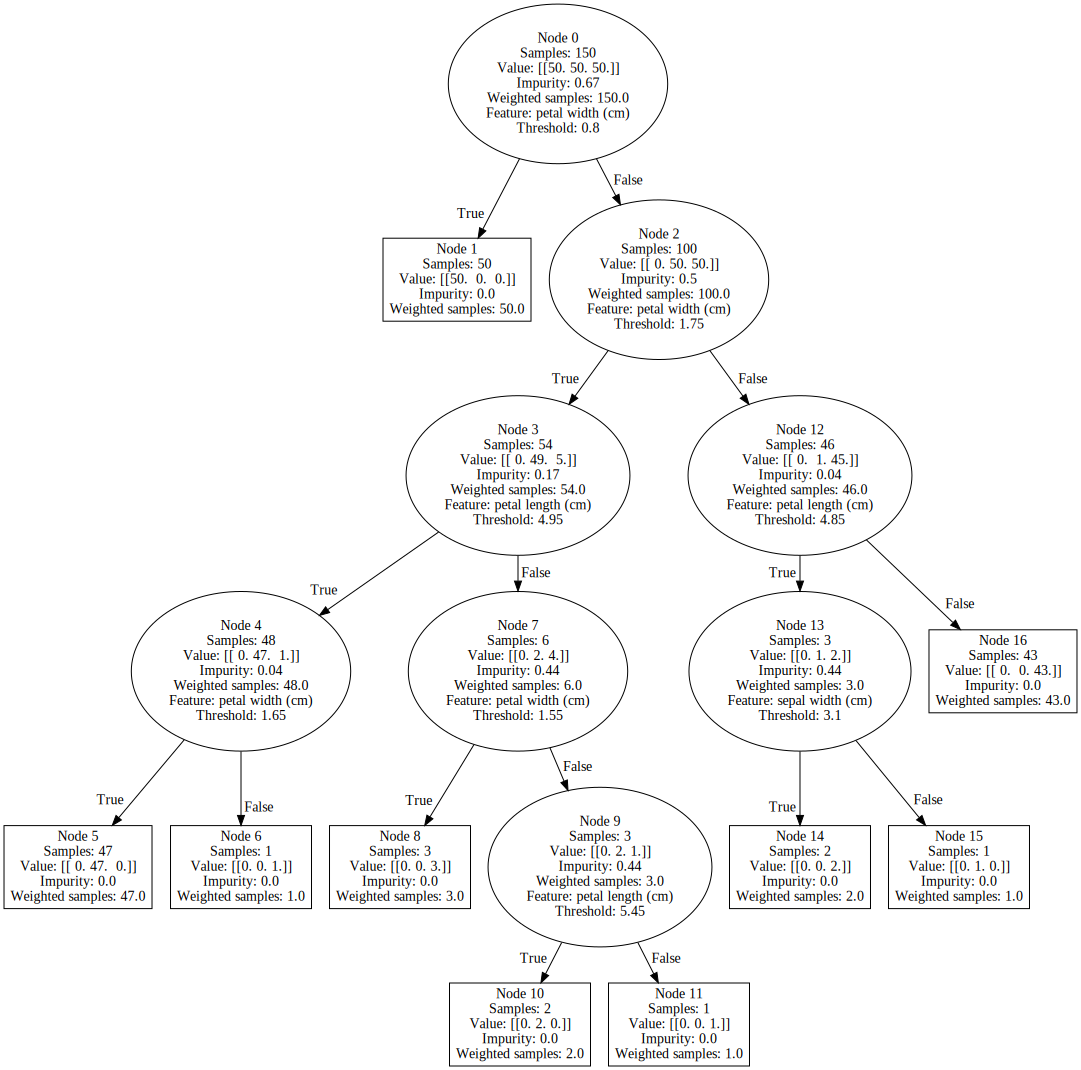

In [ ]:
# Install graphviz in the Colab environment (if not already installed)
!apt-get install graphviz -y

# Save the DOT source to a file
with open(dot_path, 'w') as f:
    f.write(dot_source)

# Use graphviz to render the image and display it within the notebook
import graphviz
with open(dot_path) as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
import os
import numpy as np
import graphviz
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Train a decision tree classifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X, y)

# Optionally, train a Random Forest to get OOB error (if you need OOB error)
# forest = RandomForestClassifier(oob_score=True, random_state=0)
# forest.fit(X, y)

# Extract information from the tree for visualization
n_nodes = tree.tree_.node_count
children_left = tree.tree_.children_left
children_right = tree.tree_.children_right
feature = tree.tree_.feature
threshold = tree.tree_.threshold
impurity = tree.tree_.impurity
n_node_samples = tree.tree_.n_node_samples
weighted_n_node_samples = tree.tree_.weighted_n_node_samples
feature_names = data.feature_names
class_names = data.target_names

# Calculate impurity reduction for each node
impurity_reduction = np.zeros(shape=n_nodes)
for node in range(n_nodes):
    if children_left[node] != children_right[node]:  # if not a leaf node
        left_weight = weighted_n_node_samples[children_left[node]] / weighted_n_node_samples[node]
        right_weight = weighted_n_node_samples[children_right[node]] / weighted_n_node_samples[node]
        impurity_reduction[node] = impurity[node] - (left_weight * impurity[children_left[node]] + right_weight * impurity[children_right[node]])

# Placeholder for custom metric computation (replace with your actual computation)
custom_metric = np.random.rand(n_nodes)  # Example: random numbers as custom metric

# Check if nodes are leaves
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
for i in range(n_nodes):
    if children_left[i] == children_right[i]:
        is_leaves[i] = True

# Function to generate DOT source from the tree structure
def get_dot_source(tree, feature_names, class_names, impurity_reduction, custom_metric):
    dot_source = 'digraph Tree {\n'

    for i in range(n_nodes):
        node_info = f"Node {i}\\n"
        node_info += f"Samples: {n_node_samples[i]}\\n"
        node_info += f"Value: {tree.tree_.value[i].round(2)}\\n"
        node_info += f"Impurity: {impurity[i].round(2)}\\n"
        node_info += f"Impurity Reduction: {impurity_reduction[i].round(2)}\\n"
        node_info += f"Custom Metric: {custom_metric[i].round(2)}\\n"
        node_info += f"Weighted samples: {weighted_n_node_samples[i].round(2)}\\n"

        if is_leaves[i]:
            dot_source += f'{i} [label="{node_info}", shape="box"];\n'
        else:
            node_info += f"Feature: {feature_names[feature[i]]}\\n"
            node_info += f"Threshold: {threshold[i].round(2)}"
            dot_source += f'{i} [label="{node_info}"];\n'

        if children_left[i] != -1:
            dot_source += f'{i} -> {children_left[i]} [labeldistance=2.5, labelangle=45, headlabel="True"];\n'
        if children_right[i] != -1:
            dot_source += f'{i} -> {children_right[i]} [labeldistance=2.5, labelangle=-45, headlabel="False"];\n'

    dot_source += '}'
    return dot_source

# Generate the DOT source
dot_source = get_dot_source(tree, feature_names, class_names, impurity_reduction, custom_metric)

# Define file paths
directory = '/mnt/data'
if not os.path.exists(directory):
    os.makedirs(directory)

dot_path = os.path.join(directory, 'tree_graph.dot')
png_path = os.path.join(directory, 'tree_graph.png')

# Save the DOT source to a file
with open(dot_path, 'w') as f:
    f.write(dot_source)

# Use the command line utility of Graphviz to render the PNG image
!dot -Tpng {dot_path} -o {png_path}

# The PNG file path
print(f"The tree graph is saved as {png_path}")

The tree graph is saved as /mnt/data/tree_graph.png


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


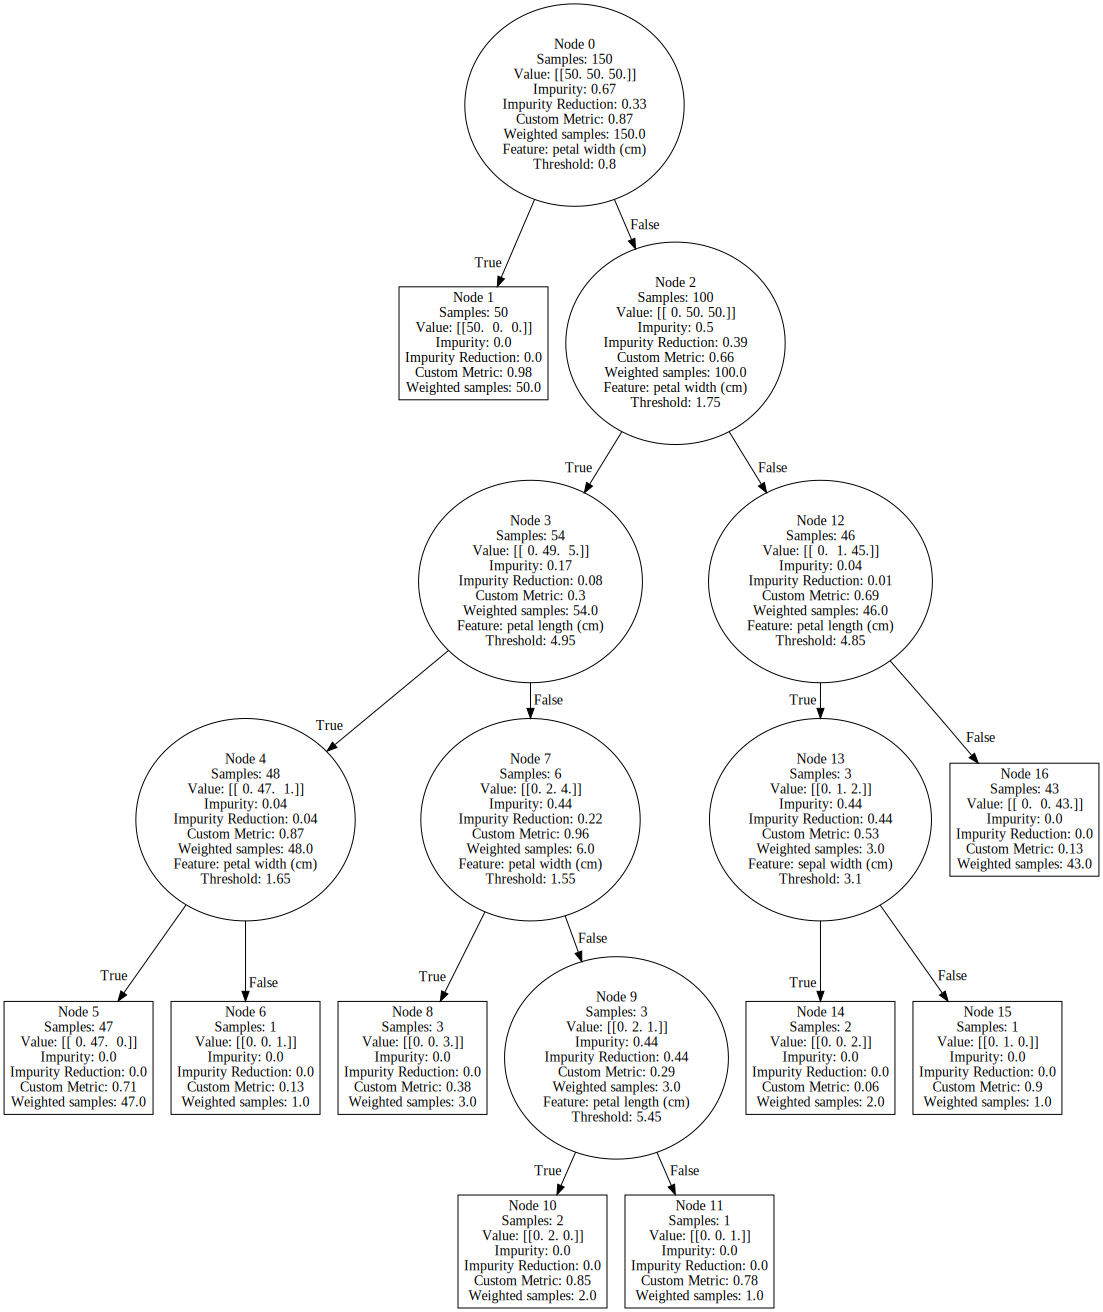

In [ ]:
# Install graphviz in the Colab environment (if not already installed)
!apt-get install graphviz -y

# Save the DOT source to a file
with open(dot_path, 'w') as f:
    f.write(dot_source)

# Use graphviz to render the image and display it within the notebook
import graphviz
with open(dot_path) as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
import os
import numpy as np
import graphviz
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, _tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import is_classifier

def calculate_impurity_reduction(tree):
    """Calculate impurity reduction for each node in the decision tree."""
    n_nodes = tree.node_count
    children_left = tree.children_left
    children_right = tree.children_right
    impurity = tree.impurity
    weighted_n_node_samples = tree.weighted_n_node_samples

    impurity_reduction = np.zeros(shape=n_nodes)
    for node in range(n_nodes):
        if children_left[node] != children_right[node]:  # if not a leaf node
            left_weight = weighted_n_node_samples[children_left[node]] / weighted_n_node_samples[node]
            right_weight = weighted_n_node_samples[children_right[node]] / weighted_n_node_samples[node]
            impurity_reduction[node] = impurity[node] - (left_weight * impurity[children_left[node]] + right_weight * impurity[children_right[node]])
    return impurity_reduction

def get_oob_error(model):
    """Get OOB error for models that support it."""
    if isinstance(model, RandomForestClassifier) and hasattr(model, 'oob_score_'):
        return 1 - model.oob_score_
    return None

def get_dot_source(tree, feature_names, class_names, impurity_reduction, custom_metric, oob_error=None):
    """
    Generate DOT source for tree visualization.

    Parameters:
    - tree: The trained tree model.
    - feature_names: Names of the features.
    - class_names: Names of the target classes.
    - impurity_reduction: Impurity reduction values for the tree nodes.
    - custom_metric: Custom metric values for the tree nodes.
    - oob_error: OOB error of the model (if applicable).

    Returns:
    - The DOT source as a string.
    """
    n_nodes = tree.node_count
    children_left = tree.children_left
    children_right = tree.children_right
    feature = tree.feature
    threshold = tree.threshold
    impurity = tree.impurity
    n_node_samples = tree.n_node_samples
    weighted_n_node_samples = tree.weighted_n_node_samples

    dot_source = 'digraph Tree {\n'

    if oob_error is not None:
        dot_source += f'label="OOB Error: {oob_error.round(2)}\\n";\n'
        dot_source += 'labelloc="t";\n'  # Position the model-level label at the top

    for i in range(n_nodes):
        node_info = f"Node {i}\\n"
        node_info += f"Samples: {n_node_samples[i]}\\n"
        node_info += f"Value: {tree.value[i].round(2)}\\n"
        node_info += f"Impurity: {impurity[i].round(2)}\\n"
        node_info += f"Impurity Reduction: {impurity_reduction[i].round(2)}\\n"
        node_info += f"Custom Metric: {custom_metric[i].round(2)}\\n"
        node_info += f"Weighted samples: {weighted_n_node_samples[i].round(2)}\\n"

        if children_left[i] == children_right[i]:  # if leaf node
            dot_source += f'{i} [label="{node_info}", shape="box"];\n'
        else:
            node_info += f"Feature: {feature_names[feature[i]]}\\n"
            node_info += f"Threshold: {threshold[i].round(2)}"
            dot_source += f'{i} [label="{node_info}"];\n'

        if children_left[i] != -1:
            dot_source += f'{i} -> {children_left[i]} [labeldistance=2.5, labelangle=45, headlabel="True"];\n'
        if children_right[i] != -1:
            dot_source += f'{i} -> {children_right[i]} [labeldistance=2.5, labelangle=-45, headlabel="False"];\n'

    dot_source += '}'
    return dot_source

def auto_generate_dot_source(model, feature_names, class_names):
    """
    Automatically compute metrics and generate DOT source for tree visualization.

    Parameters:
    - model: The trained model (DecisionTreeClassifier or RandomForestClassifier).
    - feature_names: Names of the features.
    - class_names: Names of the target classes.

    Returns:
    - The DOT source as a string.
    """
    is_rf = isinstance(model, RandomForestClassifier)

    # For RandomForest, use one of the trees, for DecisionTree, use the model itself
    tree = model.estimators_[0].tree_ if is_rf else model.tree_

    # Compute metrics
    impurity_reduction = calculate_impurity_reduction(tree)
    custom_metric = np.random.rand(tree.node_count)  # Placeholder for custom metric
    oob_error = get_oob_error(model) if is_rf else None  # Compute OOB error if model is RandomForest

    # Generate the DOT source
    dot_source = get_dot_source(tree, feature_names, class_names, impurity_reduction, custom_metric, oob_error)
    return dot_source

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Train a model (DecisionTree or RandomForest)
# model = DecisionTreeClassifier(random_state=0)
model = RandomForestClassifier(oob_score=True, random_state=0)
model.fit(X, y)

# Automatically compute metrics and generate the DOT source
dot_source = auto_generate_dot_source(model, data.feature_names, data.target_names)

# Define file paths
directory = '/mnt/data'
if not os.path.exists(directory):
    os.makedirs(directory)

dot_path = os.path.join(directory, 'tree_graph.dot')
png_path = os.path.join(directory, 'tree_graph.png')

# Save the DOT source to a file
with open(dot_path, 'w') as f:
    f.write(dot_source)

# Use the command line utility of Graphviz to render the PNG image
!dot -Tpng {dot_path} -o {png_path}

# The PNG file path
print(f"The tree graph is saved as {png_path}")

The tree graph is saved as /mnt/data/tree_graph.png


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


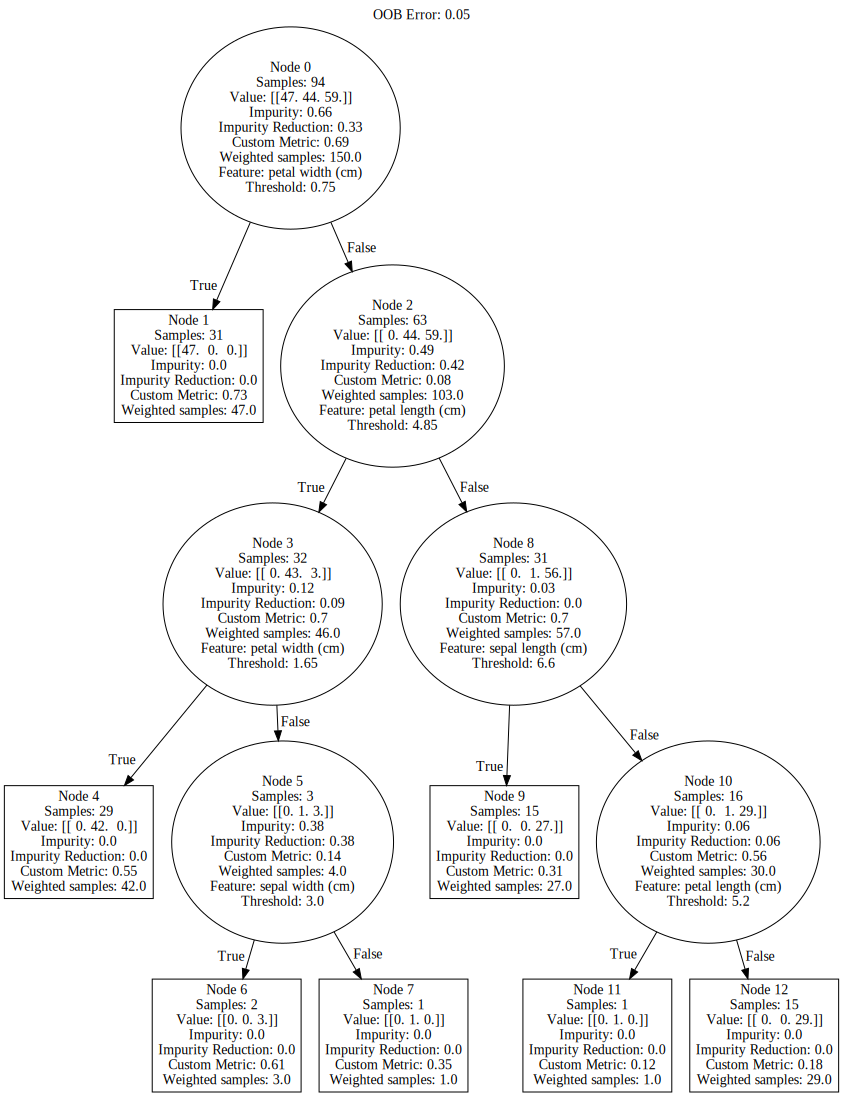

In [ ]:
# Install graphviz in the Colab environment (if not already installed)
!apt-get install graphviz -y

# Save the DOT source to a file
with open(dot_path, 'w') as f:
    f.write(dot_source)

# Use graphviz to render the image and display it within the notebook
import graphviz
with open(dot_path) as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
import os
import numpy as np
import graphviz
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, _tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import is_classifier

def calculate_impurity_reduction(tree):
    """Calculate impurity reduction for each node in the decision tree."""
    n_nodes = tree.node_count
    children_left = tree.children_left
    children_right = tree.children_right
    impurity = tree.impurity
    weighted_n_node_samples = tree.weighted_n_node_samples

    impurity_reduction = np.zeros(shape=n_nodes)
    for node in range(n_nodes):
        if children_left[node] != children_right[node]:  # if not a leaf node
            left_weight = weighted_n_node_samples[children_left[node]] / weighted_n_node_samples[node]
            right_weight = weighted_n_node_samples[children_right[node]] / weighted_n_node_samples[node]
            impurity_reduction[node] = impurity[node] - (left_weight * impurity[children_left[node]] + right_weight * impurity[children_right[node]])
    return impurity_reduction

def get_oob_error(model):
    """Get OOB error for models that support it."""
    if isinstance(model, RandomForestClassifier) and hasattr(model, 'oob_score_'):
        return 1 - model.oob_score_
    return None

def get_dot_source(tree, feature_names, class_names, impurity_reduction, custom_metric, oob_error=None):
    """
    Generate DOT source for tree visualization.

    Parameters:
    - tree: The trained tree model.
    - feature_names: Names of the features.
    - class_names: Names of the target classes.
    - impurity_reduction: Impurity reduction values for the tree nodes.
    - custom_metric: Custom metric values for the tree nodes.
    - oob_error: OOB error of the model (if applicable).

    Returns:
    - The DOT source as a string.
    """
    n_nodes = tree.node_count
    children_left = tree.children_left
    children_right = tree.children_right
    feature = tree.feature
    threshold = tree.threshold
    impurity = tree.impurity
    n_node_samples = tree.n_node_samples
    weighted_n_node_samples = tree.weighted_n_node_samples

    dot_source = 'digraph Tree {\n'

    if oob_error is not None:
        dot_source += f'label="OOB Error: {oob_error.round(2)}\\n";\n'
        dot_source += 'labelloc="t";\n'  # Position the model-level label at the top

    for i in range(n_nodes):
        node_info = f"Node {i}\\n"
        node_info += f"Samples: {n_node_samples[i]}\\n"
        node_info += f"Value: {tree.value[i].round(2)}\\n"
        node_info += f"Impurity: {impurity[i].round(2)}\\n"
        node_info += f"Impurity Reduction: {impurity_reduction[i].round(2)}\\n"
        node_info += f"Custom Metric: {custom_metric[i].round(2)}\\n"
        node_info += f"Weighted samples: {weighted_n_node_samples[i].round(2)}\\n"

        if children_left[i] == children_right[i]:  # if leaf node
            dot_source += f'{i} [label="{node_info}", shape="box"];\n'
        else:
            node_info += f"Feature: {feature_names[feature[i]]}\\n"
            node_info += f"Threshold: {threshold[i].round(2)}"
            dot_source += f'{i} [label="{node_info}"];\n'

        if children_left[i] != -1:
            dot_source += f'{i} -> {children_left[i]} [labeldistance=2.5, labelangle=45, headlabel="True"];\n'
        if children_right[i] != -1:
            dot_source += f'{i} -> {children_right[i]} [labeldistance=2.5, labelangle=-45, headlabel="False"];\n'

    dot_source += '}'
    return dot_source

def auto_generate_dot_source(model, feature_names, class_names):
    """
    Automatically compute metrics and generate DOT source for tree visualization.

    Parameters:
    - model: The trained model (DecisionTreeClassifier or RandomForestClassifier).
    - feature_names: Names of the features.
    - class_names: Names of the target classes.

    Returns:
    - The DOT source as a string.
    """
    is_rf = isinstance(model, RandomForestClassifier)

    # For RandomForest, use one of the trees, for DecisionTree, use the model itself
    tree = model.estimators_[0].tree_ if is_rf else model.tree_

    # Compute metrics
    impurity_reduction = calculate_impurity_reduction(tree)
    custom_metric = np.random.rand(tree.node_count)  # Placeholder for custom metric
    oob_error = get_oob_error(model) if is_rf else None  # Compute OOB error if model is RandomForest

    # Generate the DOT source
    dot_source = get_dot_source(tree, feature_names, class_names, impurity_reduction, custom_metric, oob_error)
    return dot_source


from sklearn.tree import DecisionTreeClassifier

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Train a DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
model.fit(X, y)

# Automatically compute metrics and generate the DOT source
dot_source = auto_generate_dot_source(model, data.feature_names, data.target_names)

# ... (rest of your code for saving and rendering the tree) ...


# Define file paths
directory = '/mnt/data'
if not os.path.exists(directory):
    os.makedirs(directory)

dot_path = os.path.join(directory, 'tree_graph.dot')
png_path = os.path.join(directory, 'tree_graph.png')

# Save the DOT source to a file
with open(dot_path, 'w') as f:
    f.write(dot_source)

# Use the command line utility of Graphviz to render the PNG image
!dot -Tpng {dot_path} -o {png_path}

# The PNG file path
print(f"The tree graph is saved as {png_path}")

The tree graph is saved as /mnt/data/tree_graph.png


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


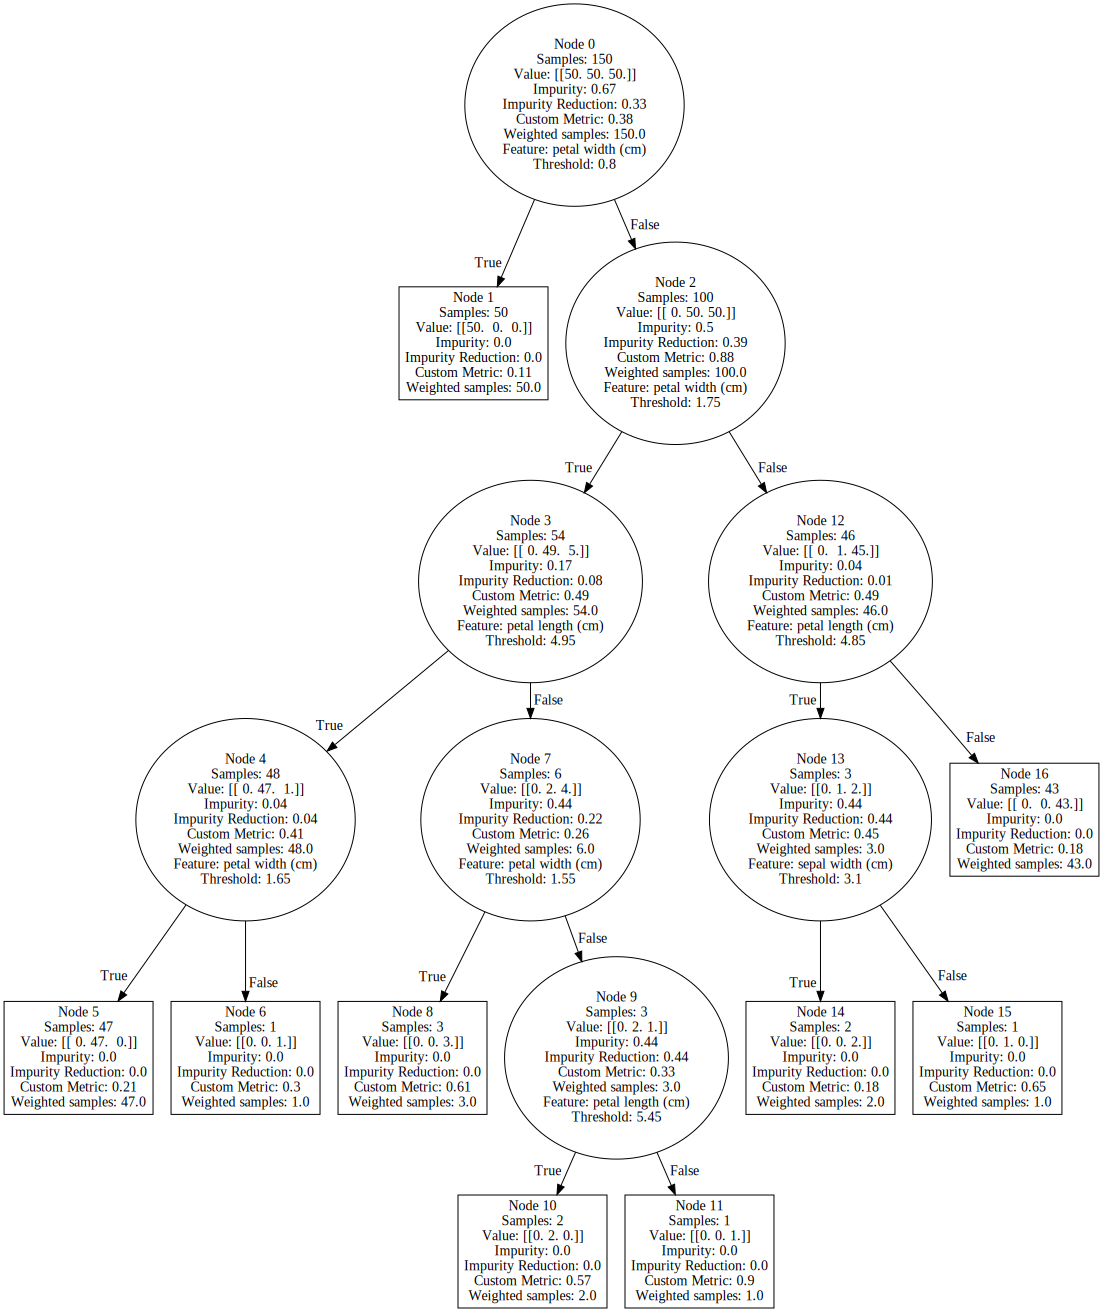

In [ ]:
# Install graphviz in the Colab environment (if not already installed)
!apt-get install graphviz -y

# Save the DOT source to a file
with open(dot_path, 'w') as f:
    f.write(dot_source)

# Use graphviz to render the image and display it within the notebook
import graphviz
with open(dot_path) as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)